In [24]:
#24

## Train a linear regression model.

#### → Train the linear regression model using training set
#### → Test the created model using testing set

## 1. SET ENVIORNMENT

#### Import Required Library

In [28]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Import Dataset

In [29]:
startup50 = pd.read_csv("50_Startups.csv")

## 2. Data Exploration

In [32]:
startup50.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [33]:
startup50.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [34]:
len(startup50.columns)

5

#### ESTABLISH RELATIONSHIP BETWEEN DATA COLUMNS - BY HEATMAP

In [35]:
import seaborn as sns

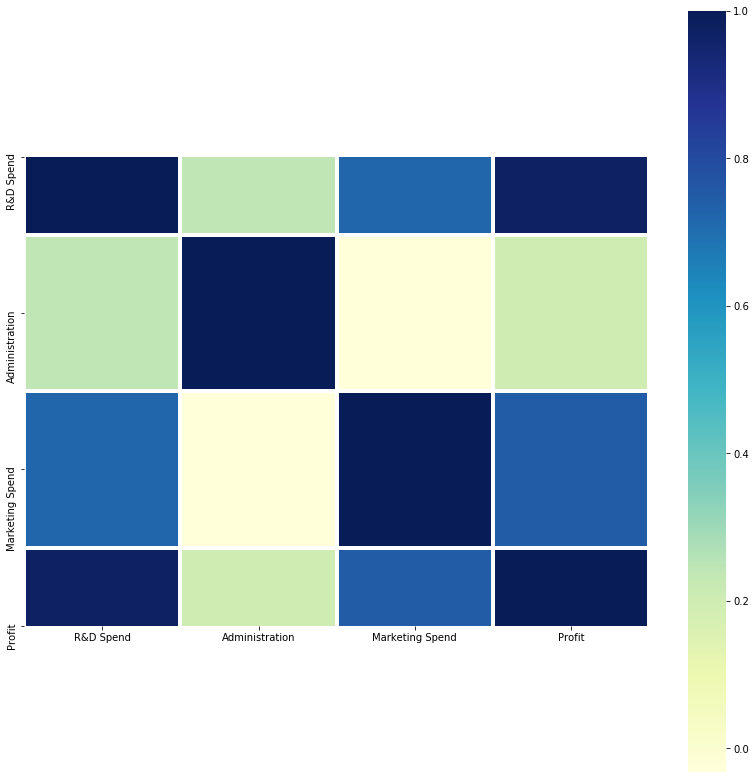

In [37]:
hetmp = startup50.corr()

plt.figure(figsize = (14,14))

sns.heatmap(hetmp,
            cbar = True,
            linewidths = 3,
            vmax = 1.0,
            square = True,
            xticklabels = 'auto',
            yticklabels = 'auto',
            cmap = 'YlGnBu',
            linecolor = 'white')

Profit has a strong relationship with R&D spend which is also shown in out headmap

### 3. TRAIN & TEST SPLIT

In [117]:
X = startup50.iloc[:, :3].values
y = startup50.iloc[:, 4:5].values

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [119]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
y_predict = regressor.predict(X_test)

In [121]:
y_predict

array([[103901.8969696 ],
       [132763.05993126],
       [133567.90370044],
       [ 72911.78976736],
       [179627.92567224],
       [115166.64864795],
       [ 67113.5769057 ],
       [ 98154.80686776],
       [114756.11555221],
       [169064.01408795]])

In [122]:
y_test

array([[103282.38],
       [144259.4 ],
       [146121.95],
       [ 77798.83],
       [191050.39],
       [105008.31],
       [ 81229.06],
       [ 97483.56],
       [110352.25],
       [166187.94]])

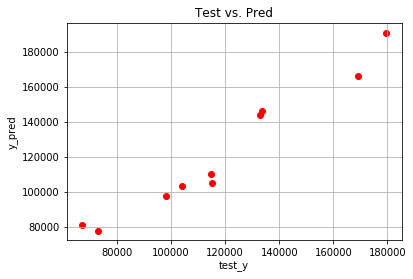

In [123]:
colors = 'red','blue'
plt.scatter(y_predict, y_test, marker='o', c='red')
plt.xlabel('test_y')
plt.ylabel('y_pred')
plt.title('Test vs. Pred')
plt.grid(True)
plt.show()